## DATASET 1

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from scipy.io import arff


In [35]:
dataset_1 = arff.loadarff('dataset/KC1.arff')
df_1 = pd.DataFrame(dataset_1[0])
print("KC1 (Defective or Not)/Software defect prediction")
df_1.head()

KC1 (Defective or Not)/Software defect prediction


,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,DL
0,0.0,0.0,24.0,4.0,100.0,0.0,0.0,2.0,110.0,73.0,...,7376.0,8.39,50969.11,38600.75,2575.0,4801.0,1066.0,832.0,2828.0,b'1'
1,0.0,0.0,19.0,4.0,100.0,0.0,0.0,3.0,78.0,30.0,...,3350.0,4.40,22480.91,18081.27,1168.0,2182.0,483.0,336.0,1221.0,b'1'
2,100.0,0.0,13.0,1.0,88.0,0.0,0.0,0.0,99.0,99.0,...,3377.0,32.51,7318.61,15736.22,1278.0,2099.0,813.0,608.0,1522.0,b'1'
3,0.0,0.0,21.0,4.0,100.0,0.0,0.0,2.0,68.0,30.0,...,3745.0,3.95,22958.05,20114.74,1393.0,2352.0,551.0,333.0,1408.0,b'1'
4,5.0,0.0,17.0,2.0,90.0,0.0,0.0,1.0,69.0,36.0,...,1412.0,15.06,5723.73,7030.53,509.0,903.0,290.0,229.0,504.0,b'1'


In [36]:
xx = df_1.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xx)
df_1 = pd.DataFrame(x_scaled, columns=df_1.columns)

In [37]:
df_1.describe()

,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL,DL
count,145.00000,145.0,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.14400,0.0,0.346552,0.166667,0.687241,0.042759,0.013793,0.211494,0.154862,0.174207,...,0.064872,0.142492,0.038630,0.059498,0.061553,0.067059,0.076211,0.080250,0.102462,0.413793
std,0.32533,0.0,0.265697,0.209718,0.368886,0.139814,0.117036,0.231787,0.163076,0.174490,...,0.117500,0.143897,0.101561,0.115054,0.113558,0.120354,0.120014,0.116917,0.155453,0.494219
min,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.0,0.125000,0.000000,0.580000,0.000000,0.000000,0.000000,0.045045,0.080000,...,0.004296,0.051369,0.000188,0.002204,0.004055,0.004456,0.009890,0.015184,0.014920,0.000000
50%,0.00000,0.0,0.333333,0.166667,0.840000,0.000000,0.000000,0.333333,0.126126,0.120000,...,0.033298,0.105506,0.010343,0.028639,0.031764,0.034903,0.043407,0.048445,0.055864,0.000000
75%,0.00000,0.0,0.583333,0.166667,0.960000,0.000000,0.000000,0.333333,0.198198,0.220000,...,0.063820,0.172255,0.027595,0.057175,0.058797,0.067132,0.077473,0.088937,0.108952,1.000000
max,1.00000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

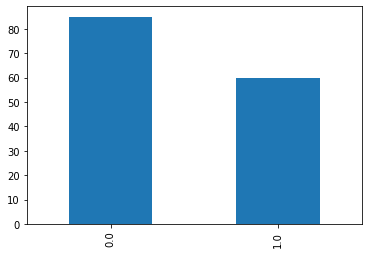

In [38]:
df_1['DL'].value_counts().plot(kind='bar')

In [39]:
X1 = df_1.drop(columns=['DL'])
X1.head()

,PERCENT_PUB_DATA,ACCESS_TO_PUB_DATA,COUPLING_BETWEEN_OBJECTS,DEPTH,LACK_OF_COHESION_OF_METHODS,NUM_OF_CHILDREN,DEP_ON_CHILD,FAN_IN,RESPONSE_FOR_CLASS,WEIGHTED_METHODS_PER_CLASS,...,sumHALSTEAD_ERROR_EST,sumHALSTEAD_LENGTH,sumHALSTEAD_LEVEL,sumHALSTEAD_PROG_TIME,sumHALSTEAD_VOLUME,sumNUM_OPERANDS,sumNUM_OPERATORS,sumNUM_UNIQUE_OPERANDS,sumNUM_UNIQUE_OPERATORS,sumLOC_TOTAL
0,0.00,0.0,1.000000,0.500000,1.00,0.0,0.0,0.666667,0.495495,0.73,...,0.612750,0.660222,0.258074,0.464795,0.610376,0.580086,0.713055,0.585714,0.601591,0.980916
1,0.00,0.0,0.791667,0.500000,1.00,0.0,0.0,1.000000,0.351351,0.30,...,0.287345,0.299857,0.135343,0.205007,0.285911,0.263122,0.324075,0.265385,0.242950,0.423317
2,1.00,0.0,0.541667,0.000000,0.88,0.0,0.0,0.000000,0.445946,0.99,...,0.244529,0.302274,1.000000,0.066740,0.248830,0.287903,0.311748,0.446703,0.439624,0.527759
3,0.00,0.0,0.875000,0.500000,1.00,0.0,0.0,0.666667,0.306306,0.30,...,0.320171,0.335213,0.121501,0.209358,0.318065,0.313809,0.349324,0.302747,0.240781,0.488203
4,0.05,0.0,0.708333,0.166667,0.90,0.0,0.0,0.333333,0.310811,0.36,...,0.109420,0.126387,0.463242,0.052196,0.111171,0.114665,0.134116,0.159341,0.165582,0.174532


In [40]:
y1 = df_1['DL'].values
y1=y1.astype('int')
y1[0:94]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1])

## Resultados
Para a avaliação dos classificadores k-NN com e sem peso, cada base de dados foi submetida ao k-fold cross validation, onde o valor escolhido para k foi 10. Cada classificador executou para os números de vizinhos k = {1,2,3,5,7,9,11,13,15}. As acurácias obtidas utilizando o dataset 1 seguem abaixo:


In [41]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
knn_weight = KNeighborsClassifier(weights='distance')

k_values = [1,2,3,5,7,9,11,13,15]
param_grid = {'n_neighbors': k_values}

# k-NN sem peso
knn_gscv1 = GridSearchCV(knn, param_grid, cv=10)
knn_gscv1.fit(X1, y1)
# k-NN com peso
knn_weight_gscv1 = GridSearchCV(knn_weight, param_grid, cv=10)
knn_weight_gscv1.fit(X1, y1)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15]})

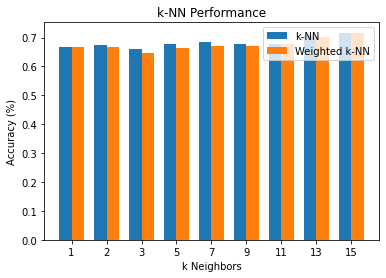

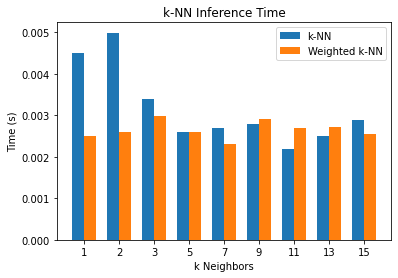

In [42]:
fig, ax = plt.subplots()

index = np.arange(len(k_values))
bar_width = 0.35
opacity = 0.4
rects1 = ax.bar(index, knn_gscv1.cv_results_['mean_test_score'], bar_width, label='k-NN')
rects2 = ax.bar(index+bar_width, knn_weight_gscv1.cv_results_['mean_test_score'], bar_width, label='Weighted k-NN')

ax.set_xlabel('k Neighbors')
ax.set_ylabel('Accuracy (%)')
ax.set_title('k-NN Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '5', '7', '9', '11', '13', '15'))
ax.legend()


fig, ax = plt.subplots()

index = np.arange(len(k_values))
bar_width = 0.35
opacity = 0.4
rects1 = ax.bar(index, knn_gscv1.cv_results_['mean_fit_time'], bar_width, label='k-NN')
rects2 = ax.bar(index+bar_width, knn_weight_gscv1.cv_results_['mean_fit_time'], bar_width, label='Weighted k-NN')

ax.set_xlabel('k Neighbors')
ax.set_ylabel('Time (s)')
ax.set_title('k-NN Inference Time')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('1', '2', '3', '5', '7', '9', '11', '13', '15'))
ax.legend()